In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms.functional as tF
import numpy as np
import torch.optim as optim 
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = tF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
tfs = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
mnist = datasets.MNIST("C:/data",download=True,transform=tfs,train = True)

9913344it [00:01, 6039315.85it/s]                             


Extracting C:/data\MNIST\raw\train-images-idx3-ubyte.gz to C:/data\MNIST\raw



29696it [00:00, 9872705.42it/s]          


Extracting C:/data\MNIST\raw\train-labels-idx1-ubyte.gz to C:/data\MNIST\raw



1649664it [00:00, 8433904.74it/s]                            


Extracting C:/data\MNIST\raw\t10k-images-idx3-ubyte.gz to C:/data\MNIST\raw



5120it [00:00, 5115492.25it/s]          
C:\Users\Wickkiey\anaconda3\envs\gpu\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting C:/data\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:/data\MNIST\raw



In [5]:
mnist_loader = torch.utils.data.DataLoader(mnist,batch_size=4)

In [6]:
a = iter(mnist_loader).next()[0]

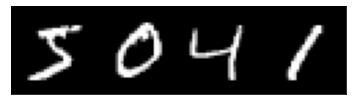

In [7]:
show(make_grid(a))

In [8]:
i = a[0]
i.shape

torch.Size([1, 28, 28])

In [9]:
i = torch.unsqueeze(i,0)

In [10]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.comp = nn.Sequential(
            nn.Conv2d(1,6,3),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,12,3)
        )

        self.decomp = nn.Sequential(
            nn.ConvTranspose2d(12,6,7,2,0),
            nn.BatchNorm2d(6),
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(6,3,5,1,1),
            nn.BatchNorm2d(3),
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(3,1,2,1,1),
            nn.LeakyReLU(True),
           

        )
    def forward(self,x):
        x =  self.comp(x)
        return self.decomp(x)

In [11]:
m  = model()

In [12]:
optimizer = optim.Adam(m.parameters(),lr=0.0003)

In [13]:
loss_fn = nn.MSELoss()

In [14]:
b = iter(mnist_loader).next()
o = m(b[0])

In [15]:
loss_fn(b[0],o)

tensor(1.2493, grad_fn=<MseLossBackward>)

In [17]:
epochs = 1

for e in range(epochs):
    m.zero_grad()
    for i, data in enumerate(mnist_loader):
        x = data[0]
        step = i

        model_out = m(x)
        loss_val = loss_fn(x,model_out)

        loss_val.backward()
        optimizer.step()
        
        if step %500 == 0:
            print(f"Epoch {e}/{step} loss loss {loss_val.item()}")

Epoch 0/0 loss loss 1.2492738962173462
Epoch 0/500 loss loss 0.07199254631996155
Epoch 0/1000 loss loss 0.052905287593603134
Epoch 0/1500 loss loss 0.04332705959677696
Epoch 0/2000 loss loss 0.07594753801822662
Epoch 0/2500 loss loss 0.04311077296733856
Epoch 0/3000 loss loss 0.04254471883177757
Epoch 0/3500 loss loss 0.056709643453359604
Epoch 0/4000 loss loss 0.07602863013744354
Epoch 0/4500 loss loss 0.04046717286109924
Epoch 0/5000 loss loss 0.10001285374164581
Epoch 0/5500 loss loss 0.0529167503118515
Epoch 0/6000 loss loss 0.09073798358440399
Epoch 0/6500 loss loss 0.09699565172195435
Epoch 0/7000 loss loss 0.06786798685789108
Epoch 0/7500 loss loss 0.04737952724099159
Epoch 0/8000 loss loss 0.08699484169483185
Epoch 0/8500 loss loss 0.058700498193502426
Epoch 0/9000 loss loss 0.08350769430398941
Epoch 0/9500 loss loss 0.07822836935520172
Epoch 0/10000 loss loss 0.060248538851737976
Epoch 0/10500 loss loss 0.04766151309013367
Epoch 0/11000 loss loss 0.08109878748655319
Epoch 0/11

In [242]:
inp = iter(mnist_loader).next()[0][0]
inp.shape

torch.Size([1, 28, 28])

In [243]:
inp = torch.unsqueeze(inp,0)
inp.shape


torch.Size([1, 1, 28, 28])

In [245]:
inp_out = m(inp)

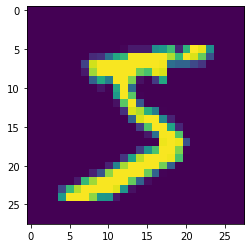

In [246]:
plt.imshow(inp[0][0])

In [249]:
inp_out = inp_out.detach().numpy()

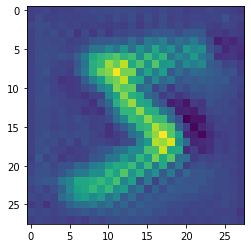

In [250]:
plt.imshow(inp_out[0][0])